# Lab 5 Part 2: Array Stack vs Singly Linked List Stack

Lecturer: <code>Sirasit Lochanachit</code>

Course:

<code>01526121 Data Structures and Algorithms [SIIE]
</code>

Term: <code>02/2024</code>

---

# Lab 5-3 Implement a LIFO stack using Singly Linked List

## Problem Description

Your task is to implement a Stack data structure using Singly Linked List data structure in Python.


## Requirements

1. For this implementation, the __top of stack is the head of the list__.

2. Each stack instance maintains two variables.
    1.   The `_head` member is a reference to the node at the head of the list (or None, if the stack is empty).
    2.   The `_size` instance variable keeps track the current number of elements.
      * Otherwise, we need to search through the entire list to count the number of
elements when reporting the stack's size.

3. Use `NumberNode` class (as defined below) to create a new data node.
4. Implement the following methods:
    * push()
    * top()
    * pop()
    * printStack()

In [1]:
class NumberNode:
    def __init__(self, element, next):
        self._element = element
        self._next = next

In [2]:
class LinkedStack:
    """LIFO Stack implementation using a singly linked list for storage."""

    def __init__(self):
        """ Create an empty stack. """
        self._head = None                      # reference to the head node
        self._size = 0                        # number of stack elements

    def __len__(self):
        """ Return the number of elements in the stack. """
        return self._size

    def is_empty(self):
        """ Return True if the stack is empty."""
        return self._size == 0

    def push(self, e):
        """ Add element e to the top of the stack as a new head node. """

        new_node = NumberNode(e, self._head)
        self._head = new_node
        self._size += 1



        pass

    def top(self):
        """ Return (but not remove) the element at the top of the stack.

        Raise Empty exception if the stack is empty.
        """

        if self.is_empty():
            raise Empty("Stack is empty")
        return self._head._element

        pass

    def pop(self):
        """ Remove and return the element from the top of the stack.

        Raise Empty exception if the stack is empty.
        """

        if self.is_empty():
            raise Empty("Stack is empty")
        result = self._head._element        # Store the top element to return
        self._head = self._head._next       # Update the head to the next node
        self._size -= 1
        return result

        pass

    def printStack(self):
        """ Print the stack elements starting from the top. """

        current = self._head
        elements = []
        while current is not None:           # Traverse through the nodes
            elements.append(str(current._element))
            current = current._next
        print("Stack (top to bottom):", " -> ".join(elements))

        pass

In [3]:
class Empty(Exception):
  """ Error attempting to access an element from an empty container. """
  pass

## Testing Codes

Push 2 elements into the stack.

In [32]:
S = LinkedStack()  # contents: []
S.push(7)         # contents: [7]
S.push(5)         # contents: [5, 7]
print('Number of elements: {}'.format(len(S)))     # contents: [5, 7]

Number of elements: 2


In [33]:
S.printStack()

Stack (top to bottom): 5 -> 7


Pop elements and check whether stack is empty

In [34]:
print('Remove item: {}'.format(S.pop()))          # contents: [7]
print('Is stack empty?: {}'.format(S.is_empty())) # contents: [7]
print('Remove item: {}'.format(S.pop()))          # contents: []
print('Is stack empty?: {}'.format(S.is_empty())) # contents: []

Remove item: 5
Is stack empty?: False
Remove item: 7
Is stack empty?: True


In [35]:
S.printStack()

Stack (top to bottom): 


Attempting to remove or retrieve item when stack is empty

In [37]:
print(S.pop())    # contents: []

Empty: Stack is empty

In [38]:
print(S.top())    # contents: []

Empty: Stack is empty

Push more elements into stack, then pop one element

In [39]:
S.push(2)         # contents = [2]
S.push(4)         # contents = [4, 2]
print('Retrieve top item: {}'.format(S.top()))    # contents = [4, 2]
S.push(6)                                         # contents = [6, 4, 2]
print('Number of elements: {}'.format(len(S)))    # contents = [6, 4, 2]
print('Remove item: {}'.format(S.pop()))          # contents = [4, 2]
S.push(1)         # contents = [1, 4, 2]

Retrieve top item: 4
Number of elements: 3
Remove item: 6


In [40]:
S.printStack()

Stack (top to bottom): 1 -> 4 -> 2


## Structured Test Case

We will use `assert` statements to verify that our stack operations are producing the expected results.

This is a common practice in software development to ensure code correctness.

Here is a test case structure with `assert` statements:

In [41]:
def test_linked_stack():
    my_stack = LinkedStack()

    # Test 1: Push operations and size
    my_stack.push(10)
    my_stack.push(20)
    my_stack.push(30)
    assert my_stack._size == 3, "Stack size should be 3 after pushing 3 elements"

    # Test 2: Top operation
    assert my_stack.top() == 30, "Top element should be 30"

    # Test 3: Pop operation and size
    popped_element = my_stack.pop()
    assert popped_element == 30, "Popped element should be 30"
    assert my_stack._size == 2, "Stack size should be 2 after popping 1 element"

    # Test 4: Display operation (You can add visual checks or capture output for verification)
    print("Stack after popping one element:")
    my_stack.printStack()  # Expected output: 20 -> 10 -> None

    # Test 5: Multiple pops and is_empty
    my_stack.pop()
    my_stack.pop()
    assert my_stack.is_empty(), "Stack should be empty after popping all elements"

    # Test 6: Pop and top on empty stack
    try:
        my_stack.pop()
        my_stack.top()
    except Empty:
        print("Pop and top on empty stack raised Empty exception as expected")

    #ssert my_stack.pop() is None, "Pop on empty stack should return None"
    #assert my_stack.top() is None, "Top on empty stack should return None"

    print("All test cases passed!")

if __name__ == "__main__":
    test_linked_stack()

Stack after popping one element:
Stack (top to bottom): 20 -> 10
Pop and top on empty stack raised Empty exception as expected
All test cases passed!


Simply run the code above and if your code is all correct, the result should display 'All test cases passed'

---

# Lab 5-4 Comparing runtime operations between ArrayStack vs LinkedStack

In [14]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

Given input size (n) that grows from 10 to 10,000

In [15]:
ns = np.linspace(10, 10000, 50, dtype=int)
ns

array([   10,   213,   417,   621,   825,  1029,  1233,  1437,  1641,
        1844,  2048,  2252,  2456,  2660,  2864,  3068,  3272,  3475,
        3679,  3883,  4087,  4291,  4495,  4699,  4903,  5106,  5310,
        5514,  5718,  5922,  6126,  6330,  6534,  6737,  6941,  7145,
        7349,  7553,  7757,  7961,  8165,  8368,  8572,  8776,  8980,
        9184,  9388,  9592,  9796, 10000])

## Pre-requisites

Copy and paste your ArrayStack implementation here (without any print functions inside the class)  

In [16]:
class ArrayStack:


    def __init__(self):
        """Create an empty stack."""
        self._data = []

    def push(self, e):
        """Add element e to the top of the stack."""
        self._data.append(e)

    def pop(self):
        """Remove and return the element from the top of the stack."""
        if self.is_empty():
            raise Empty("Stack is empty")
        return self._data.pop()

    def top(self):
        """Return (but do not remove) the element at the top of the stack."""
        if self.is_empty():
            raise Empty("Stack is empty")
        return self._data[-1]

    def is_empty(self):
        """Return True if the stack is empty."""
        return len(self._data) == 0

    def __len__(self):
        """Return the number of elements in the stack."""
        return len(self._data)


class Empty(Exception):
  """ Error attempting to access an element from an empty container. """
  pass

### 4.1 What is the runtime behaviour of adding element method in a stack between ArrayStack and LinkedStack classes? Plot the graph to answer this.
* Each test should run push method `n` times and each test of `n` should execute 10 rounds


In [27]:
ts7 = [timeit.timeit(stmt=f'for i in range({n}): ars.push(i)',
                     setup='ars = ArrayStack()',
                     globals=globals(),
                     number=10)
       for n in ns]

In [28]:
ts8 = [timeit.timeit(stmt=f'for i in range({n}): ls.push(i)',
                     setup='ls = LinkedStack()',
                     globals=globals(),
                     number=10)
       for n in ns]

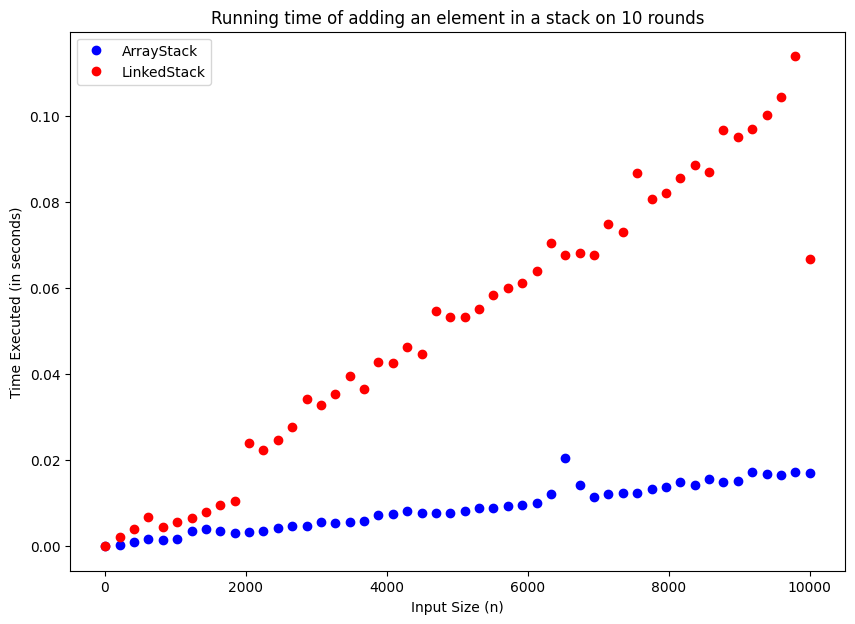

In [29]:
plt.figure(figsize=(10,7))
plt.plot(ns, ts7, 'ob')
plt.plot(ns, ts8, 'or');
plt.xlabel('Input Size (n)');
plt.ylabel('Time Executed (in seconds)');
plt.title('Running time of adding an element in a stack on 10 rounds');
plt.legend(['ArrayStack', 'LinkedStack']);

### 4.2 What is the runtime behaviour of removing element method in a stack between ArrayStack and LinkedStack classes? Plot the graph to answer this.
* Each test should run pop method `n` times and each test of `n` should execute 10 rounds
* The setup should provide 100000 elements in a stack/queue before recording running time.

In [22]:
ts9 = [timeit.timeit(stmt=f'for _ in range ({n}): ars.pop()',
                     setup='ars = ArrayStack(); [ars.push(1) for _ in range(100000)]',
                     globals=globals(),
                     number=10)
       for n in ns]

ts10 = [timeit.timeit(stmt=f'for _ in range ({n}): ls.pop()',
                     setup='ls = LinkedStack(); [ls.push(1) for _ in range(100000)]',
                     globals=globals(),
                     number=10)
       for n in ns]

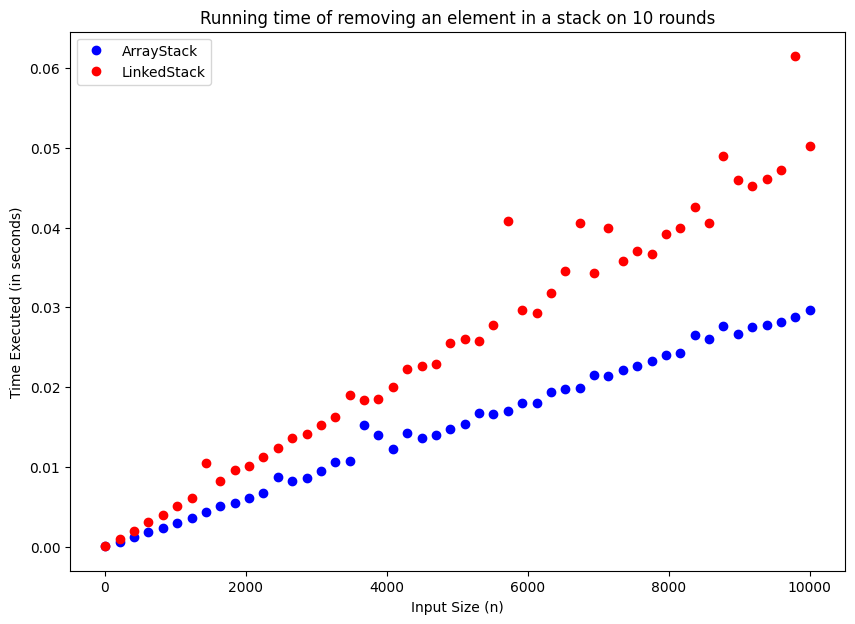

In [23]:
plt.figure(figsize=(10,7))
plt.plot(ns, ts9, 'ob')
plt.plot(ns, ts10, 'or');
plt.xlabel('Input Size (n)');
plt.ylabel('Time Executed (in seconds)');
plt.title('Running time of removing an element in a stack on 10 rounds');
plt.legend(['ArrayStack', 'LinkedStack']);

---